In [1]:
import pandas as pd #for tasks related to data : import, export, manipulation
import numpy as np #for numerical tasks
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #multidimensional plot

In [3]:
df = pd.read_csv('C:/Users/Home/Downloads/Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#cleaning the data
def data_clean(df):
    df.fillna(0,inplace = True) #zero imputation
    print(df.isnull().sum())

In [8]:
data_clean(df)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
print(df['Age'].head(10)) 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [14]:
#Check the number of missing values in the 'Age' column
missing_age_count = df['Age'].isnull().sum()
print(f"\nNumber of missing 'Age' values: {missing_age_count}")


Number of missing 'Age' values: 0


In [16]:
# Perform mean imputation on the 'Age' column
# Get the mean of the 'Age' column, ignoring NaN values
df['Age']= df['Age'].mean()
df['Age'].fillna(df['Age'], inplace=True)

In [19]:
print(df['Age'].head(10)) # Print the first 10 values again to show the filled NaNs

0    23.799293
1    23.799293
2    23.799293
3    23.799293
4    23.799293
5    23.799293
6    23.799293
7    23.799293
8    23.799293
9    23.799293
Name: Age, dtype: float64


In [20]:
# Verify that there are no more missing values
remaining_missing_age = df['Age'].isnull().sum()
print(f"\nNumber of 'Age' values after imputation: {remaining_missing_age}")


Number of 'Age' values after imputation: 0


In [26]:
#Changing categorical data into numerical data using encoding techniques
print("Original DataFrame (first 5 rows):")
print(df[['Sex', 'Embarked']].head())

Original DataFrame (first 5 rows):
      Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S


In [23]:
# Select categorical features for encoding
categorical_features = ['Sex', 'Embarked']

In [24]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# The 'drop_first=True' argument is used to avoid multicollinearity.
# For 'Sex', it creates one column 'Sex_male'. '1' means male, '0' means female.
# For 'Embarked', it creates 'Embarked_Q' and 'Embarked_S'. '0,0' means 'C'.

In [25]:
print("\nDataFrame after One-Hot Encoding (first 5 rows):")
print(df_encoded[['Sex_male', 'Embarked_Q', 'Embarked_S']].head())


DataFrame after One-Hot Encoding (first 5 rows):
   Sex_male  Embarked_Q  Embarked_S
0      True       False        True
1     False       False       False
2     False       False        True
3     False       False        True
4      True       False        True


In [27]:
#Normalize/standardize numerical features
# Drop rows with missing values for 'Age' and 'Fare' to simplify the example
# In a real-world scenario,we would handle missing values first (e.g., with imputation)
df.dropna(subset=['Age', 'Fare'], inplace=True)

In [28]:
# Selecting the numerical features to be scaled
numerical_features = ['Age', 'Fare']
data_to_scale = df[numerical_features]

In [29]:
print("Original 'Age' and 'Fare' values (first 5 rows):")
print(data_to_scale.head())

Original 'Age' and 'Fare' values (first 5 rows):
         Age     Fare
0  23.799293   7.2500
1  23.799293  71.2833
2  23.799293   7.9250
3  23.799293  53.1000
4  23.799293   8.0500


In [31]:
# Create a StandardScaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_to_scale)

In [32]:
# Convert the scaled data back to a DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

In [33]:
print("\nScaled 'Age' and 'Fare' values (first 5 rows):")
print(scaled_df.head())


Scaled 'Age' and 'Fare' values (first 5 rows):
            Age      Fare
0  3.552714e-15 -0.502445
1  3.552714e-15  0.786845
2  3.552714e-15 -0.488854
3  3.552714e-15  0.420730
4  3.552714e-15 -0.486337


In [34]:
# Print the mean and standard deviation of the scaled data to verify
print("\nMean of scaled 'Age':", scaled_df['Age'].mean())
print("Standard deviation of scaled 'Age':", scaled_df['Age'].std())
print("Mean of scaled 'Fare':", scaled_df['Fare'].mean())
print("Standard deviation of scaled 'Fare':", scaled_df['Fare'].std())


Mean of scaled 'Age': 3.552713678800501e-15
Standard deviation of scaled 'Age': 0.0
Mean of scaled 'Fare': 3.987332972840069e-18
Standard deviation of scaled 'Fare': 1.0005616400330462


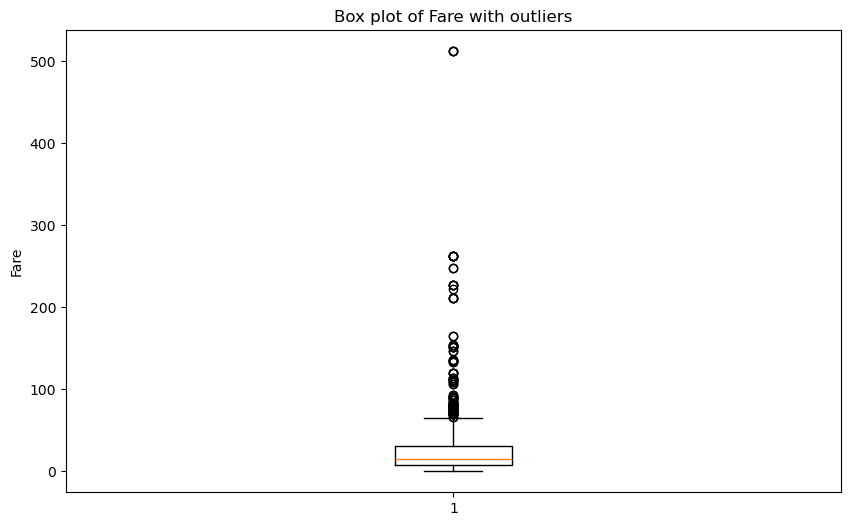

In [35]:
# Visualize outliers with a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare with outliers')
plt.ylabel('Fare')
plt.show()

In [36]:
# Calculate the IQR to define outlier boundaries
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

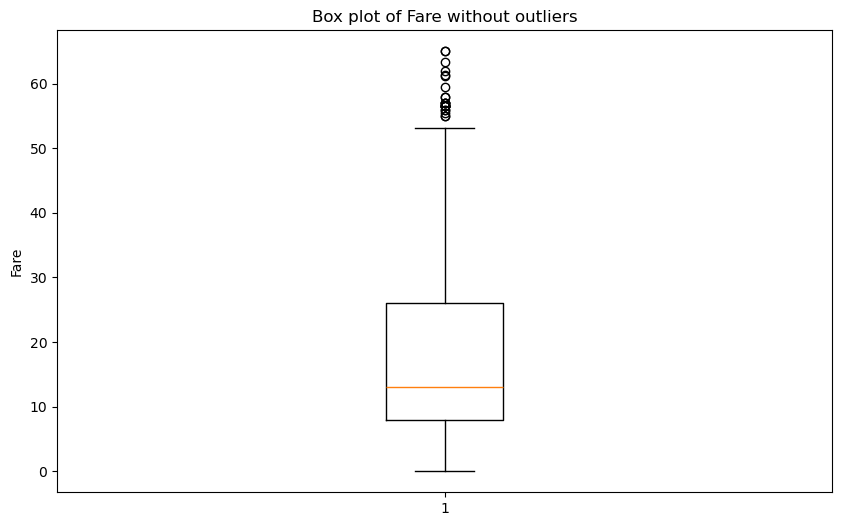

In [37]:
# Visualize the data after outlier removal
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['Fare'])
plt.title('Box plot of Fare without outliers')
plt.ylabel('Fare')
plt.show()

In [38]:
# Print the number of rows before and after outlier removal
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_no_outliers)}")

Original number of rows: 891
Number of rows after outlier removal: 775
